# Analysis and Design of Algorithms
## First Midterm Exam

- Name: 


-- --

**Section I**: Which **sorting algorithm** best meets each of the characteristics mentioned? Justify your answer briefly (one or two paragraphs). *Value: 25 points (5 points per question).*

1. It is very easy to program and suitable when movements are more costly than comparisons. It works with any type of comparable data, not just integers.

> **Answer:**

2. The predicate isSorted(array, 0, k) is satisfied in its k-th iteration, such that isSorted(array, left, right) returns true if the sub-array from left to right is sorted. In other words, from index 0 to index k, they are sorted in the k-th iteration of the main loop (outer loop). Being sorted does not mean they are in their final positions.

> **Answer:**


3. It finishes processing small search spaces BEFORE processing large ones.

> **Answer:**

4. It offers **maximum efficiency** for sorting positive integers, especially with repeated values, but is inadequate for real values or text strings.

> **Answer:**

5. For the following sorting algorithms covered in class, classify whether they are stable or not. For those that are **not stable**, provide a brief justification (what part of the algorithm makes them unstable).
   


> **Answer:**  
- Quicksort:
- Counting Sort:
- Mergesort:
- Heapsort:
- Radix Sort:

-- --
**Section II**: Consider the following algorithm. *Value 40 points*

In [12]:
def processArray(array):
    count=0
    for i in range(len(array)//2):
        swapped = False
       
        for j in range(i, len(array)-i-1): 
            count+=1
            if array[j]<array[j+1]:
                array[j],array[j+1]= array[j+1],array[j]
                swapped=True
        for j in range(len(array)-i-2, i, -1): #j>i
            count+=1
            if array[j]>array[j-1]:
                array[j],array[j-1]= array[j-1],array[j]
                swapped=True 
        if not swapped:
            break
    print(count)

# arr=[12,2,14,5,213,341,21,456,234,4,2564,23,54]
# processArray(arr)
# print(arr)

1) In general terms, what does the algorithm do and how does it do it? (one or two paragraphs) *Value: 5 points*

> **Answer:**

2) Using a priori analysis (**using summations**), determine the value of the variable "count" for an array of size N for the best and worst cases. Explain the indices and exponents of your initial approach. (Do not use handwritten notes or images). *Value: 15 points (5 for best case, 10 for worst case)*

> Simplify your answer so that you have only one term of each degree, for example:
- $ax^3 + bx^2 + cx +d$
- $ax^2 + bx + c$
- $ax + b$
- $alog_b(c)+d$
- $log_b(a)+c$

> **Answer:**

In [ ]:
# Verification (run the cell and display the output at the end)
def checkWorstCase(n):
    print()  # Inside the print, write the polynomial obtained

processArray( ) # Provide an array considered the worst case with a size of 10
checkWorstCase(10)

processArray( ) # Provide an array considered the worst case with a size of 50
checkWorstCase(50)

3) What is the a posteriori complexity (of comparisons) for this algorithm (for arrays of sizes from 20 to 600, with increments of 5, and 30 runs for each array size)? Show the graph with a trendline and provide a conclusion about the complexity. *Value: 10 points*


> **Answer:**



4) Demonstrate that the best-case complexity is better than quadratic through a contradiction (tip: show that it is **not** $\Omega(N^2)$). *Value: 10 points*

> **Answer:**

-- --

**Section III**: Code the function isHeap(array, mx=True), which determines if an array is a heap. The second parameter "mx" indicates that the parent should be greater than the children if it is true, and if it is false, the parent should be smaller than its children. Also, test it for mx=True and mx=False. *Value: 10 points*

In [7]:
def isHeap(array, mx=True):
    # Your answer here
    pass

In [ ]:
# Testing, all should return True (do not modify these code lines)
print(isHeap([10,9,8,7,6,5,4,3,2,1],  True)   == True)
print(isHeap([10,8,9,6,7,4,5,2,3,1],  True)   == True)
print(isHeap([10,8,9,6,7,5,4,3,2,11], True)   == False) 
print(isHeap([10,6,9,4,8,7,5,3,2,1],  True)   == False)
print(isHeap([10,8,9,6,7,5,4,3,2,1],  False)  == False)
print(isHeap([1,2,3,4,5,6,7,8,9,10],  False)  == True)
print(isHeap([1,3,2,5,4,7,6,9,8,10],  False)  == True)
print(isHeap([1,3,2,5,4,7,6,9,8,0],   False)  == False)

-- --

**Section IV**: Perform the following considering the 2-3-4 tree algorithm seen in class: *Value 30 points*

a) Implement a recursive method searchValue(node, value) **that takes advantage of the structure of the BTree** to find the desired value. If it finds the value, return the index, or -1 if it doesn't find it. Base your code on what was covered in class. *Value: 10 points*.

In [ ]:
def getPosition(node, value):
    for i in range(len(node.values)):
        if value < node.values[i]:
            return i
    
    return len(node.values)
        


class GNode:
    max_type = 4
    
    def __init__(self, value = None, index=None):
        self.values = []
        self.indexes = []
        self.children = []
        self.parent= None
        self.activeSplit = False
        if value is not None:
            self.values.append(value)
            self.indexes.append(index)
   
    def getType(self):
        return len(self.values)+1
    
    def isLeaf(self):
        return len(self.children)==0
    
    def insert(self, value, index):
        pos = getPosition(self, value)
        self.values.insert(pos,value)   
        self.indexes.insert(pos,index)
        return pos
    
    def getParent(self):
        return self.parent 
    
    def addChild(self, child):
        child.parent = self
        self.children.append(child)
    
    def addChildren(self, child1, child2, index):
        child1.parent = self
        child2.parent = self
        self.children[index]=child1
        self.children.insert(index+1, child2) 


def createBTree(arr, verbose = False):
    root = GNode(arr[0],0)
    for i in range(1, len(arr)):
        current = root
        while True:
            if current.getType() == GNode.max_type and \
            (current.activeSplit or current.isLeaf() ):
                current, root= split(current, root)
                if verbose:
                    printBTree(root)
                    print(i,"---------")
                
            elif current.isLeaf():
                    current.insert(arr[i], i)
                    break
            else:
                pos = getPosition(current, arr[i])
                current = current.children[pos]
    
    return root

def split(node, root):
    mid = len(node.values)//2       
    left = GNode()
    right = GNode()
    
    for i in range(mid):
        left.insert(node.values[i],node.indexes[i])
    for i in range(mid+1, len(node.values)):
        right.insert(node.values[i],node.indexes[i])  
    
    if not node.isLeaf():
        for i in range(mid+1):
            left.addChild(node.children[i])
        for i in range(mid+1,len(node.children)):
            right.addChild(node.children[i])
        
    if node == root:
        root = GNode(node.values[mid],node.indexes[mid])
        root.addChild(left)
        root.addChild(right)
        node = root
        return node, root
    
    else:
        parent:GNode = node.getParent()
        if parent.getType() == GNode.max_type:
            parent.activeSplit = True
            return parent, root
        else:
            index = parent.insert(node.values[mid], node.indexes[mid])
            parent.addChildren(left, right, index)
            node = parent #current
            return node, root
      

def printBTree(node, spaces=""):
    print("{}{}-{}".format(spaces, node.values, node.indexes))
    if node.isLeaf():
        return
    for child in node.children:
        printBTree(child, spaces+"\t")
    

arr = [*range(1,26)]
root = createBTree(arr)      
printBTree(root)  

In [ ]:
def searchValue(node: GNode, value): 
    pass #aquí tu respuesta  

for i in range(-1,27):
    print(searchValue(root, i))

b) Make changes to store the indices of repeated values in the BTree, so that only the indices of these repeated elements are added, not the values themselves. In other words, for each value, there can be multiple indices. When printing the tree, also display the indices and show that the indices of repeated values are being stored. Highlight the changes by adding comments of the type "#CHANGE: change made" and test that it works. *Value: 20 points*

In [ ]:
# Response, Copy the BTree code again, name it BTreeRepeated, and make the modifications here
# DO NOT FORGET TO ADD COMMENTS WHERE YOU MAKE CHANGES

In [ ]:
# Test
arr = [6,-2,5,-2,6,1,32,55,9,88,107,107,2,45,6, 100,23,6]
# Print the tree with indices
# Search for values 6, -2, and 107 using searchValue

-- --

**Section V**: The following recursive function constructs a fractal as shown in the figure. Design an equivalent iterative function called fractal_Iterative, based on what was taught in class. *Value: 25 points.*


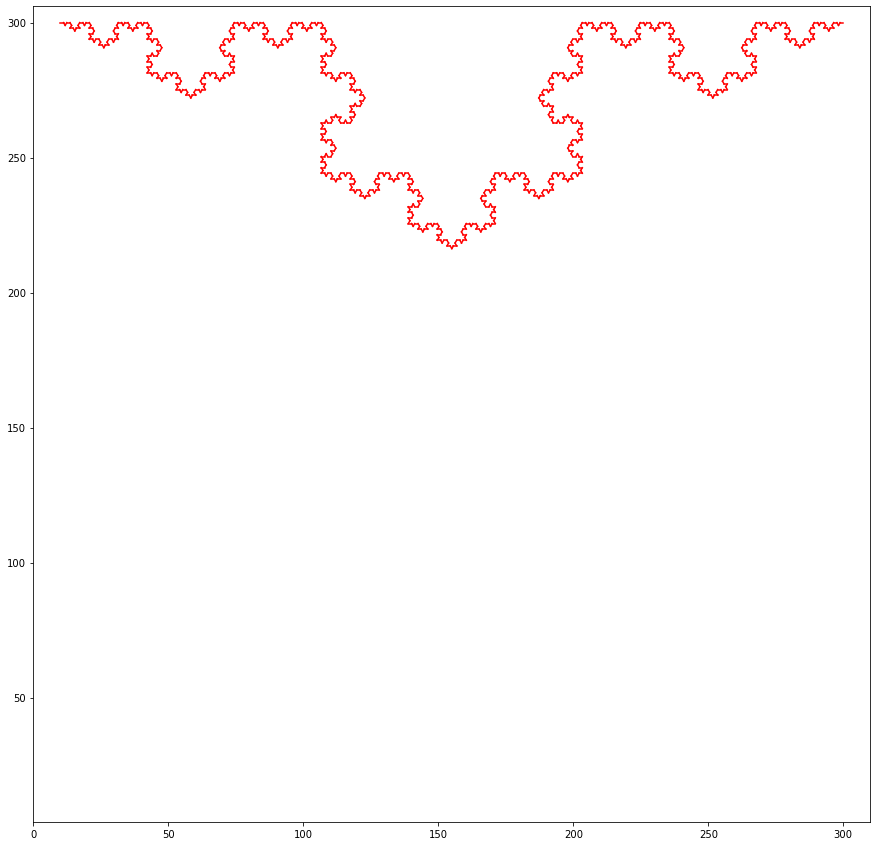

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

sin60=math.sin(3.1415/3.0)
nivel=5

def fractal(i, xp12, yp12, xp22, yp22 ):  
    dx=(xp22-xp12)/3.0
    dy=(yp22-yp12)/3.0
    xx=xp12+3*dx/2.0-dy*sin60
    yy=yp12+3*dy/2.0+dx*sin60
    if(i<=0):
        t1=plt.Line2D([xp12,xp22],[yp12,yp22], color="red")
        plt.gca().add_line(t1)
    else:
        fractal(i-1,xp12,yp12,xp12+dx,yp12+dy)
        fractal(i-1,xp12+dx,yp12+dy,xx,yy)
        fractal(i-1,xx,yy,xp22-dx,yp22-dy)
        fractal(i-1,xp22-dx,yp22-dy,xp22,yp22)

plt.figure(figsize=(15,15))
plt.axis('equal')
axes = plt.gca()
axes.set_xlim([0,310])
axes.set_ylim([0,310])
fractal(nivel,300,300,10,300)

In [ ]:
# Here's the iterative function:
# def fractal_Iterative(list of arguments)